In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd


# **Часть первая: Знакомство с Pandas.#**
Прочитайте данные с помощью метода read_html из таблицы "Коефіцієнт народжуваності в регіонах України (1950—2019)" по ссылке

Необходимо выполнить:

**1. Вывести первые строки таблицы с помощью метода head**

In [3]:
tbl = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C", match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")
table_wiki = tbl[0]
table_wiki.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


**2. Определите количество строк и столбцов в датафрейме (атрибут shape)**

In [4]:
table_wiki.shape

(28, 9)

**3. Замените в таблице значения "—" на значения NaN**

In [5]:
table_wiki = table_wiki.replace('—', 'NaN')
table_wiki

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


**4. Определите типы всех столбцов с помощью dataframe.dtypes**

In [6]:
table_wiki.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

**5.Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"**

In [7]:
table_wiki['2014'] = pd.to_numeric(table_wiki['2014'], errors='coerce')
table_wiki['2019'] = pd.to_numeric(table_wiki['2019'], errors='coerce')
table_wiki.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

**6.Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)**

In [8]:
table_isnull = table_wiki.isnull()
table_isnull.sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

**7.Удалите из таблицы данные по всей стране, последняя строчка таблицы**

In [9]:
table_drop = table_wiki.drop([27], axis=0)
table_drop

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


**8.Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)**

In [10]:
series8 = table_wiki['Регіон']
table8 = table_wiki.drop(['Регіон'], axis=1)
for i in range(table_wiki.shape[0]):
  table8.iloc[i] = table8.iloc[i].fillna(table8.iloc[i].mean())
table8.insert(0, "Регіон", series8)
table8

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000000,20.6,16.0,13.0,7.3,12.6,15.416667,15.416667
1,Вінницька,22.400000,19.2,14.2,12.4,8.4,11.2,10.900000,7.600000
2,Волинська,24.700000,25.0,17.9,15.3,11.2,14.8,14.100000,10.100000
3,Дніпропетровська,20.400000,20.4,15.1,12.3,7.1,11.2,11.100000,7.100000
4,Донецька,27.100000,21.4,14.0,10.9,6.1,9.8,8.200000,13.928571
5,Житомирська,26.100000,22.3,15.9,12.9,8.9,12.2,12.000000,7.900000
6,Закарпатська,31.400000,27.3,20.7,16.8,11.5,15.1,14.600000,10.400000
7,Запорізька,21.900000,19.7,15.0,12.4,7.1,10.6,10.600000,6.800000
8,Івано-Франківська,24.300000,24.8,18.2,15.5,10.3,12.4,12.200000,8.800000
9,Київська,20.400000,18.9,15.6,12.3,7.3,12.2,12.100000,8.000000


**9.Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине**

In [11]:
table8['2019'][table8['2019']>table_wiki['2019'][27]]

0     15.416667
2     10.100000
4     13.928571
6     10.400000
8      8.800000
11    13.800000
12     8.700000
14     8.800000
16    10.700000
23     9.200000
25    11.000000
26    10.500000
Name: 2019, dtype: float64

**10.В каком регионе была самая высокая рождаемость в 2014 году?**

In [12]:
table8['Регіон'].iloc[table8['2014'].argmax()]

'Крим'

**11.Постройте столбцовую диаграмму рождаемости по регионам в 2019 году**

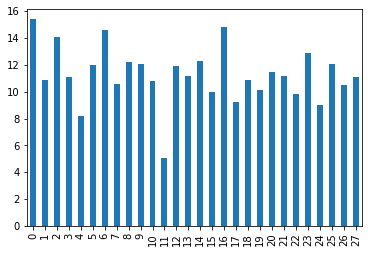

In [13]:
import matplotlib.pyplot as plt

table8['2014'].plot(kind='bar', x=table8['Регіон'])
plt.show()